In [2]:
import numpy as np
import pandas as pd


In [70]:
df = pd.DataFrame({'lons':[100,20,20,20,20,2],
                  'lats':[30,80,80,80,30,10],
                 'swhc':[10,100,60,35,15,5]})

In [71]:
df.loc[:,'lons':'lats']

,lons,lats
0,100,30
1,20,80
2,20,80
3,20,80
4,20,30
5,2,10


In [72]:
dfsort = df.sort_values(by=['lons','lats'], ascending=False)

In [73]:
dfsort

,lons,lats,swhc
0,100,30,10
1,20,80,100
2,20,80,60
3,20,80,35
4,20,30,15
5,2,10,5


In [82]:
dfsort_1 = dfsort.groupby(['lons','lats']).mean()

In [89]:
dfsort_1[0:3]

swhc
lons lats      
2    10       5
20   30      15
     80      65

In [90]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import os
import glob


In [91]:
fig = plt.figure(figsize=(16, 12))
# read all netCDF file
dir_path = 'E:\python_workfile\\remote_sensing\H2B_nc_data\H2B_20200711'
ncfiles = glob.glob(dir_path + '\*.nc')
lon_array = np.array([])
lat_array = np.array([])
swhc_array = np.array([])
swhc_mask_array = np.array([])
for ncfile in ncfiles:
    fh = Dataset(ncfile, mode='r')
    lons = fh.variables['lon'][:]
    lats = fh.variables['lat'][:]
    swhc = fh.variables['swh_c'][:]
    swhc_mask = swhc.mask
    lon_array = np.append(lon_array, lons)
    lat_array = np.append(lat_array, lats)
    swhc_array = np.append(swhc_array, swhc)
    swhc_mask_array = np.append(swhc_mask_array, swhc_mask)
    fh.close()

m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c')
# m = Basemap(projection='npaeqd', boundinglat=60, lon_0=180, resolution='c')
x, y = m(lon_array, lat_array)

<Figure size 1152x864 with 0 Axes>

{0.0: ([<matplotlib.lines.Line2D at 0x2044c6993a0>],
  [Text(0.36, -93.6, '0°')]),
 60.0: ([<matplotlib.lines.Line2D at 0x2044c3db790>],
  [Text(60.12, -93.6, '60°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x2044c3d9e50>],
  [Text(120.24, -93.6, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x2044c3d9b50>],
  [Text(180.35999999999999, -93.6, '180°')]),
 240.0: ([<matplotlib.lines.Line2D at 0x2044c3d9d00>],
  [Text(240.12, -93.6, '120°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x2044c3d9490>],
  [Text(300.24, -93.6, '60°W')]),
 360.0: ([<matplotlib.lines.Line2D at 0x2044c699280>],
  [Text(0.36, -93.6, '0°')])}

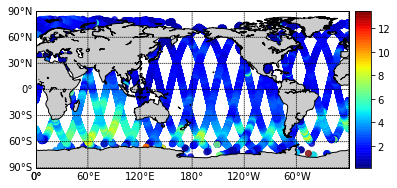

In [92]:

# Draw the scatterplot
swhc_array_masked = np.ma.array(swhc_array, mask=swhc_mask_array)
m.scatter(x, y, c=swhc_array_masked, marker='o', cmap=plt.cm.jet, alpha=0.8)
m.colorbar(location='right')
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])


In [122]:
data = pd.DataFrame(data=(lon_array, lat_array, swhc_array_masked), index=['lons', 'lats', 'swh_c']).T

In [125]:
data=data.sort_values(by=['lons', 'lats'])

In [126]:
data

,lons,lats,swh_c
49201,0.006139,46.2088,--
17212,0.006826,-12.4791,2.126
52902,0.016683,-45.3807,4.095
21484,0.018187,62.6919,3.363
17211,0.020807,-12.4221,2.24
...,...,...,...
17214,359.98,-12.5904,2.141
4008,359.987,-80.38,--
12991,359.989,-68.1015,--
17213,359.993,-12.5347,2.169


In [130]:
data.round(3)


,lons,lats,swh_c
49201,0.006139,46.2088,--
17212,0.006826,-12.4791,2.126
52902,0.016683,-45.3807,4.095
21484,0.018187,62.6919,3.363
17211,0.020807,-12.4221,2.24
...,...,...,...
17214,359.98,-12.5904,2.141
4008,359.987,-80.38,--
12991,359.989,-68.1015,--
17213,359.993,-12.5347,2.169
